In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib


# Leitura de dados locais

## CSV

In [3]:
df = pd.read_csv('banco_mundial_indicadores.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",SP.POP.TOTL,Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


## Planilha do Excel

In [53]:
df = pd.read_excel('banco_mundial_indicadores.xlsx')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",SP.POP.TOTL,Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


In [55]:
# Acessando dados
print("Crescimento populacional do Afeganistão - 2000 a 2005")
pop05 = df['2005 [YR2005]'][0]
pop00 = df['2000 [YR2000]'][0]

print(pop05-pop00)

Crescimento populacional do Afeganistão - 2000 a 2005
4874317


# Dados remotos

In [58]:
URL = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2005&per_page=1500"
df = pd.read_xml(URL)
df = df.pivot(index='country', columns='date', values='value').reset_index()
df.head()

date,country,2000,2001,2002,2003,2004,2005
0,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0
1,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0
2,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0
3,Albania,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0
4,Algeria,31042238.0,31451513.0,31855110.0,32264159.0,32692153.0,33149720.0


In [75]:
# Acessando dados após pivotear
print("Crescimento populacional do Afeganistão - 2000 a 2005")
pop05 = df[2005][0]
pop00 = df[2000][0]

print(pop05-pop00)

Crescimento populacional do Afeganistão - 2000 a 2005
4874317.0


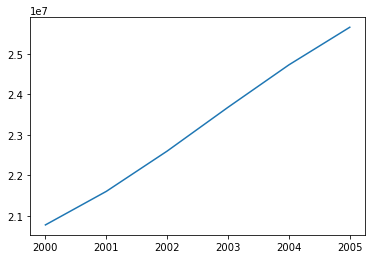

In [77]:
# Mostrando dados
s = df.loc['Afghanistan'] # Retorna todos os dados ligados a este index (country é o index!)

plt.figure()
plt.plot(s)
plt.show()